**Project Goal:** Predict an Individual's Annual Medical Insurance Premium from Health Data

[Medical Insurance Premium Dataset (Kaggle)](https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction/data)

---

Read-In from Drive

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/BZAN3307/Code_Project/Medicalpremium.csv')

Mounted at /content/drive


Read-In Manually (upload file directly to CoLab, or your preferred environment)

In [ ]:
import pandas as pd
df = pd.read_csv('Medicalpremium.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Medicalpremium.csv'

# Profiling

In [ ]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [ ]:
# Check for NaN (there's none, yay!)
df.isnull().values.any()

False

In [ ]:
# For loop to print the type of each column
for col in df.columns:
    print(f"Column '{col}' has data type: {df[col].dtype}")

Column 'Age' has data type: int64
Column 'Diabetes' has data type: int64
Column 'BloodPressureProblems' has data type: int64
Column 'AnyTransplants' has data type: int64
Column 'AnyChronicDiseases' has data type: int64
Column 'Height' has data type: int64
Column 'Weight' has data type: int64
Column 'KnownAllergies' has data type: int64
Column 'HistoryOfCancerInFamily' has data type: int64
Column 'NumberOfMajorSurgeries' has data type: int64
Column 'PremiumPrice' has data type: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.describe() # descriptive statistics for each column
# no outliers.

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
print(df.shape[0]) # rows
print(df.shape[1]) # cols

986
11


In [ ]:
# verify the below columns are all boolean of 0s and 1s
print(df.KnownAllergies.nunique())
print(df.Diabetes.nunique())
print(df.BloodPressureProblems.nunique())
print(df.AnyTransplants.nunique())
print(df.AnyChronicDiseases.nunique())
print(df.HistoryOfCancerInFamily.nunique())

# above columns are all categorical, boolean variables (yes/no to different characteristics)

# quantitative variables: number major surgeries (discrete), age (continuous), height (continuous), weight (continuous), premium price (continous)
# note that some continuous vars here are recorded in whole numbers but they are still continuous vars by def.

2
2
2
2
2
2


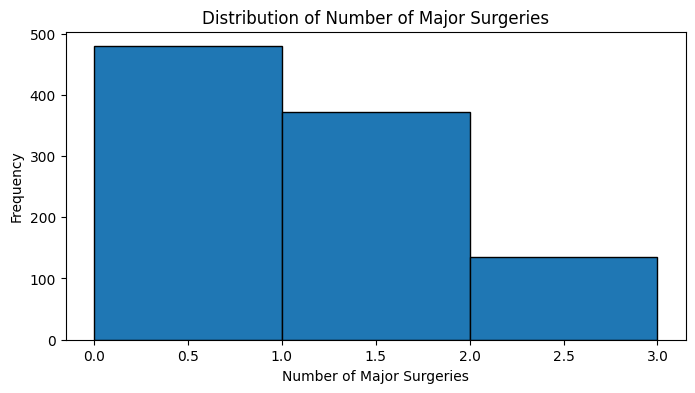

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(df['NumberOfMajorSurgeries'], bins=range(df['NumberOfMajorSurgeries'].min(), df['NumberOfMajorSurgeries'].max() + 1), edgecolor='black')
plt.title('Distribution of Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Frequency')
plt.show()
# solid distribution (note that this is DISECRETE). Would've liked a few more people with a ton of major surgeries to help the model. This could be categorical or numeric.

In [ ]:
df['NumberOfMajorSurgeries'].value_counts()

,count
NumberOfMajorSurgeries,
0,479
1,372
2,119
3,16


In [ ]:
# Here's what we are trying to predict. The outliers in # count don't necessarily worry me because this is a quantitative prediction, not a classification.

df['PremiumPrice'].value_counts()

,count
PremiumPrice,
23000,249
15000,202
28000,132
25000,103
29000,72
30000,47
35000,41
38000,34
31000,31


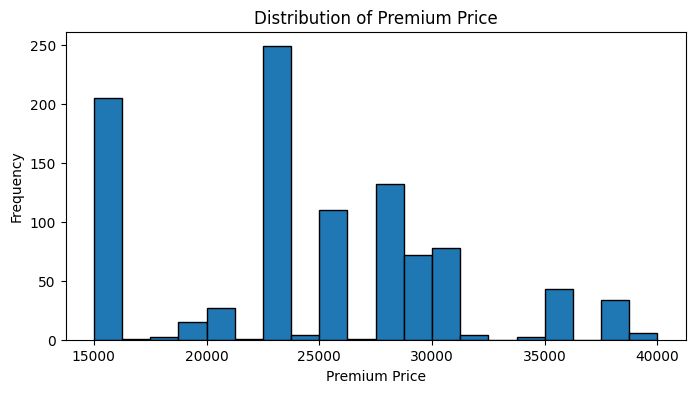

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['PremiumPrice'], bins=20, edgecolor='black')
plt.title('Distribution of Premium Price')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

# wide variation, as discussed above, which we can see in plot below. Good range and variation in frequencies.

In [ ]:
# weight representation looks okay, assuming this is in kg. Would've liked for higher representation in obese individuals.
print(df['Weight'].min())
print(df['Weight'].max())
df['Weight'].value_counts()

51
132


,count
Weight,
73,43
75,41
74,38
70,34
67,31
...,...
105,1
124,1
122,1


In [ ]:
df['Height'].value_counts()

,count
Height,
164,42
166,42
174,38
165,38
175,35
176,34
163,34
170,32
169,32


In [ ]:
# I'm very happy with the wide age representation!
print(df['Age'].min())
print(df['Age'].max())
df['Age'].value_counts()

18
66


,count
Age,
43,30
27,27
42,27
35,26
45,25
59,25
44,24
25,24
48,24


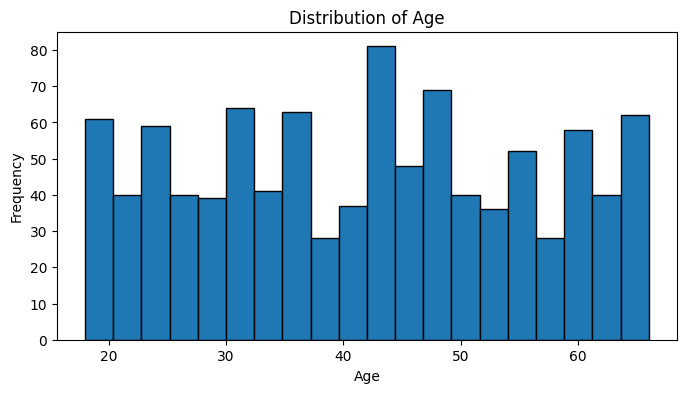

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

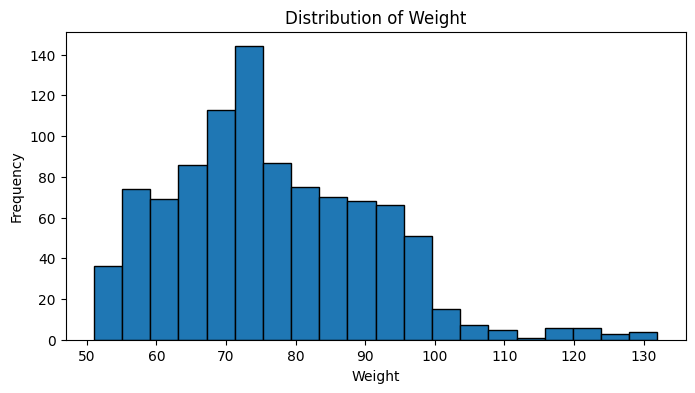

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['Weight'], bins=20, edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

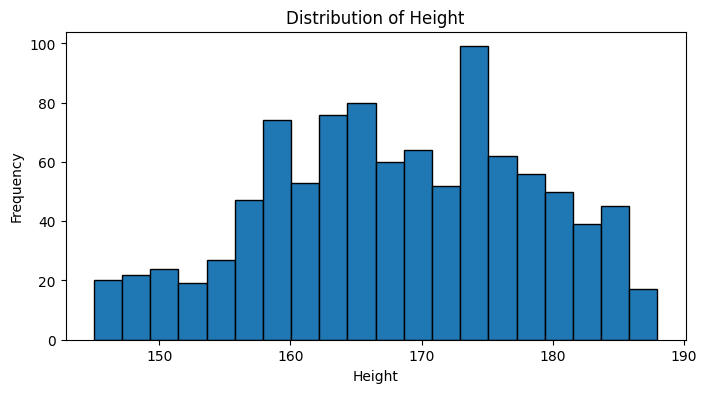

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(df['Height'], bins=20, edgecolor='black')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# List of binary qualitative variables
binary_variables = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                    'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

# Calculate percentage prevalence
prevalence = df[binary_variables].mean() * 100

# Display results
print("Percentage Prevalence of Binary Qualitative Variables:")
print(prevalence)

Percentage Prevalence of Binary Qualitative Variables:
Diabetes                   41.987830
BloodPressureProblems      46.855984
AnyTransplants              5.578093
AnyChronicDiseases         18.052738
KnownAllergies             21.501014
HistoryOfCancerInFamily    11.764706
dtype: float64


Sparse Data Check

In [ ]:
listCat = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

# Sparse threshold
sparse_threshold = 10

# Iterate over each categorical column in listCat
for col in listCat:
    print(f"Value counts for column: {col}")
    value_counts = df[col].value_counts()
    print(value_counts)

    # Identify sparse categories (categories with counts below the threshold)
    sparse_categories = value_counts[value_counts < sparse_threshold]

    if not sparse_categories.empty:
        print(f"Sparse categories in '{col}':")
        print(sparse_categories)
    else:
        print(f"No sparse categories in '{col}'.")
    print("-" * 40)

# result = no sparse categories

Value counts for column: Diabetes
Diabetes
0    572
1    414
Name: count, dtype: int64
No sparse categories in 'Diabetes'.
----------------------------------------
Value counts for column: BloodPressureProblems
BloodPressureProblems
0    524
1    462
Name: count, dtype: int64
No sparse categories in 'BloodPressureProblems'.
----------------------------------------
Value counts for column: AnyTransplants
AnyTransplants
0    931
1     55
Name: count, dtype: int64
No sparse categories in 'AnyTransplants'.
----------------------------------------
Value counts for column: AnyChronicDiseases
AnyChronicDiseases
0    808
1    178
Name: count, dtype: int64
No sparse categories in 'AnyChronicDiseases'.
----------------------------------------
Value counts for column: KnownAllergies
KnownAllergies
0    774
1    212
Name: count, dtype: int64
No sparse categories in 'KnownAllergies'.
----------------------------------------
Value counts for column: HistoryOfCancerInFamily
HistoryOfCancerInFamily
0 

# ML
Includes Model Sub-Sections

Set Up Pipelines

In [ ]:
# separate into quantitative/qualitative data

listNum = ['Age', 'Height', 'Weight','NumberOfMajorSurgeries']
listCat = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'] # 'NumberOfMajorSurgeries' can go either way


In [ ]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( df, df.PremiumPrice, test_size=0.25 )

pipeNum = Pipeline( [
	('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] ) ),
	('scaler', StandardScaler() )
	])

from sklearn.preprocessing import OneHotEncoder
pipeCat = Pipeline([
	('selector', ColumnTransformer([ ('selector', 'passthrough', listCat) ] )),
	('encoder', OneHotEncoder( dtype=int, drop='first' ) )
	])

from sklearn.pipeline import FeatureUnion
preprocessor = FeatureUnion([
	('num', pipeNum ),
	('cat', pipeCat)
	])

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
pipeLinReg = Pipeline([
	('preprocessor', preprocessor),
	('model', LinearRegression())
	])

pipeLinReg.fit(X_train, y_train)

from sklearn.metrics import r2_score
predTrainLinReg = pipeLinReg.predict( X_train )
print(f'train r2 score: {sklearn.metrics.r2_score( y_train, predTrainLinReg )}')
predTestLinReg = pipeLinReg.predict( X_test )
print(f'test r2 score: {sklearn.metrics.r2_score( y_test, predTestLinReg )}')

train r2 score: 0.6484956734228896
test r2 score: 0.6185094983730365


## Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the pipeline with the neural network
pipeNN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=28, hidden_layer_sizes=(50, 50, 50), max_iter=10000))
])

# Fit the neural network model
pipeNN.fit(X_train, y_train)

# Predict on training data
predTrainNN = pipeNN.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainNN)}')

# Predict on test data
predTestNN = pipeNN.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestNN)}')


train r2 score: 0.746194771276554
test r2 score: 0.48840402789378157


## Fine Tuning: Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the pipeline with MLPRegressor
pipeNN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=28, max_iter=10000))  # No predefined layers yet
], verbose=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__hidden_layer_sizes': [(10, 10), (50, 50)],  # Small layer sizes
    'model__activation': ['relu', 'tanh'] # Model activation functions
}

# Define GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeNN, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model on the training data
predTrainNN = best_model.predict(X_train)
print(f'Training R2 Score: {r2_score(y_train, predTrainNN)}')

# Evaluate the best model on the test data
predTestNN = best_model.predict(X_test)
print(f'Test R2 Score: {r2_score(y_test, predTestNN)}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total= 1.7min
Best Parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (50, 50)}
Training R2 Score: 0.884240149223191
Test R2 Score: 0.6260904636413006


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


## Fine Tuned: Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the pipeline with the neural network
pipeNN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=28, hidden_layer_sizes=(50,50), activation='relu', max_iter=20000))  # Define the MLPRegressor with updated parameters
])

# Fit the neural network model
pipeNN.fit(X_train, y_train)

# Predict on training data
predTrainNN = pipeNN.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainNN)}')

# Predict on test data
predTestNN = pipeNN.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestNN)}')

train r2 score: 0.9048635066784638
test r2 score: 0.6542329814423272


## Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

pipe_svr = Pipeline([
    ('scaler', StandardScaler()),  # Scale data for better performance with SVR
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # SVR with RBF kernel
])

# Fit the model
pipe_svr.fit(X_train, y_train)

# Make predictions using the best model
predTrain_svr = pipe_svr.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrain_svr)}')

predTest_svr = pipe_svr.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTest_svr)}')

train r2 score: 0.0054977252803957155
test r2 score: -0.021573053395913977


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=28))
], verbose=True)

pipeRf.fit( X_train, y_train )

predTrainRf = pipeRf.predict( X_train )
predTestRf = pipeRf.predict( X_test )

# Predict on training data
predTrainRf = pipeRf.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainRf)}')

# Predict on test data
predTestRf = pipeRf.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestRf)}')

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s
train r2 score: 0.9661047264324117
test r2 score: 0.8529188337509853


## Fine Tuning: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the base pipeline
pipeRf = Pipeline([
    ('preprocessor', preprocessor),  # Replace with your actual preprocessing pipeline
    ('model', RandomForestRegressor(random_state=28))  # RandomForestRegressor
], verbose=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],     # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],   # Minimum samples required at a leaf node
}

# Define GridSearchCV
grid_search = GridSearchCV(
    pipeRf,
    param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='r2',        # R² score
    n_jobs=-1,           # Use all available cores
    verbose=2            # Verbose output to track progress
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best pipeline model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
predTrainRf = best_model.predict(X_train)
print(f'Training R² Score: {r2_score(y_train, predTrainRf)}')

# Evaluate the best model on the test data
predTestRf = best_model.predict(X_test)
print(f'Test R² Score: {r2_score(y_test, predTestRf)}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.9s
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Training R² Score: 0.8861938962434363
Test R² Score: 0.8654040389616582


## Fine Tuned: Random Forest

In [ ]:
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=28,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=200
    ))
], verbose=True)

# Now, you can fit your pipeline as usual
pipeRf.fit(X_train, y_train)

# Predict on training data
predTrainRf = pipeRf.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainRf)}')

# Predict on test data
predTestRf = pipeRf.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestRf)}')

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.6s
train r2 score: 0.9025549866530641
test r2 score: 0.7997196515996241


Feature Importance

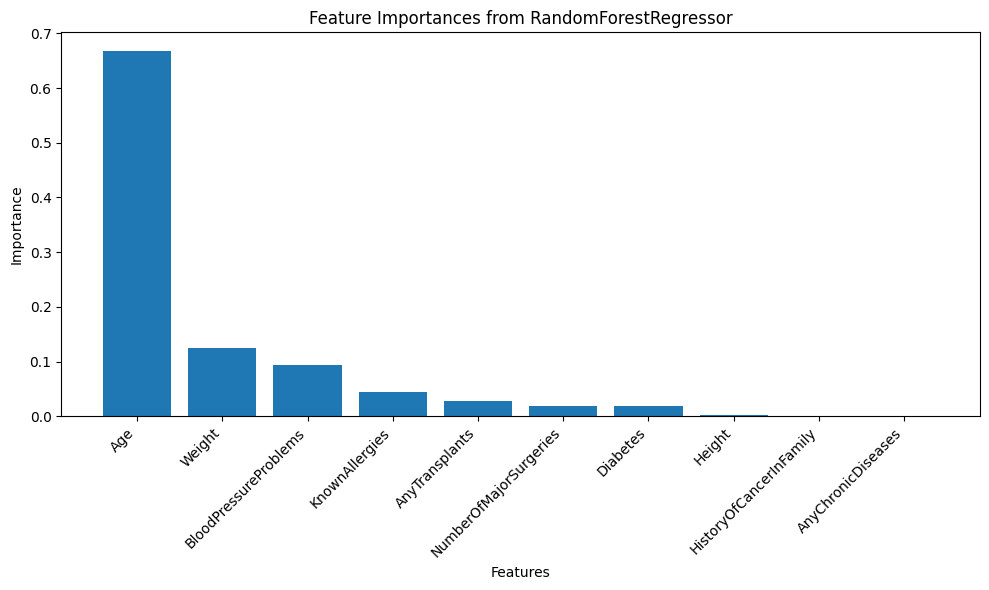

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the trained RandomForestRegressor from the pipeline
rf_model = pipeRf.named_steps['model']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances for better visualization
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.tight_layout()
plt.show()


# Remove Outliers
Test best models from above on df_trim

Remove outliers using IQR

In [ ]:
def remove_outliers_columnwise(df, columns):
    for column in columns:
        # Calculate IQR and bounds
        Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Print the current column's statistics
        print(f"Processing column: {column}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

        # Count outliers in this column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers detected in column '{column}': {outliers.shape[0]}")

        # Remove rows with outliers in the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # Print the updated DataFrame shape
        print(f"DataFrame shape after removing outliers from '{column}': {df.shape}")
        print("-" * 50)

    return df
listNum = ['Age', 'Height', 'Weight']  # Excluding 'NumberOfMajorSurgeries' because IQR is too aggressive here.
df_trim = remove_outliers_columnwise(df, listNum)

# Final shape of the DataFrame
print("Final DataFrame shape after removing all outliers:", df_trim.shape)


Processing column: Age
Q1: 30.0, Q3: 53.0, IQR: 23.0
Lower bound: -4.5, Upper bound: 87.5
Outliers detected in column 'Age': 0
DataFrame shape after removing outliers from 'Age': (986, 11)
--------------------------------------------------
Processing column: Height
Q1: 161.0, Q3: 176.0, IQR: 15.0
Lower bound: 138.5, Upper bound: 198.5
Outliers detected in column 'Height': 0
DataFrame shape after removing outliers from 'Height': (986, 11)
--------------------------------------------------
Processing column: Weight
Q1: 67.0, Q3: 87.0, IQR: 20.0
Lower bound: 37.0, Upper bound: 117.0
Outliers detected in column 'Weight': 16
DataFrame shape after removing outliers from 'Weight': (970, 11)
--------------------------------------------------
Final DataFrame shape after removing all outliers: (970, 11)


Redefine Pipelines

In [ ]:
listNum = ['Age', 'Height', 'Weight','NumberOfMajorSurgeries']
listCat = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily'] # 'NumberOfMajorSurgeries' can go either way


X_train, X_test, y_train, y_test = train_test_split( df_trim, df_trim.PremiumPrice, test_size=0.25 )

pipeNum = Pipeline( [
	('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] ) ),
	('scaler', StandardScaler() )
	])

from sklearn.preprocessing import OneHotEncoder
pipeCat = Pipeline([
	('selector', ColumnTransformer([ ('selector', 'passthrough', listCat) ] )),
	('encoder', OneHotEncoder( dtype=int, drop='first' ) )
	])

from sklearn.pipeline import FeatureUnion
preprocessor = FeatureUnion([
	('num', pipeNum ),
	('cat', pipeCat)
	])

Fine Tune Random Forest on New Data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the base pipeline
pipeRf = Pipeline([
    ('preprocessor', preprocessor),  # Replace with your actual preprocessing pipeline
    ('model', RandomForestRegressor(random_state=28))  # RandomForestRegressor
], verbose=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],     # Maximum depth of the tree
    'model__min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'model__min_samples_leaf': [1, 2, 4],   # Minimum samples required at a leaf node
}

# Define GridSearchCV
grid_search = GridSearchCV(
    pipeRf,
    param_grid,
    cv=3,                # 3-fold cross-validation
    scoring='r2',        # R² score
    n_jobs=-1,           # Use all available cores
    verbose=2            # Verbose output to track progress
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best pipeline model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
predTrainRf = best_model.predict(X_train)
print(f'Training R² Score: {r2_score(y_train, predTrainRf)}')

# Evaluate the best model on the test data
predTestRf = best_model.predict(X_test)
print(f'Test R² Score: {r2_score(y_test, predTestRf)}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s
Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}
Training R² Score: 0.8905055855327697
Test R² Score: 0.8616254339779567


Random Forest

In [ ]:
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=28,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=50
    ))
], verbose=True)

# Now, you can fit your pipeline as usual
pipeRf.fit(X_train, y_train)

# Predict on training data
predTrainRf = pipeRf.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainRf)}')

# Predict on test data
predTestRf = pipeRf.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestRf)}')

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s
train r2 score: 0.8905055855327697
test r2 score: 0.8616254339779567


Fine Tune Neural Network on New Data

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the pipeline with MLPRegressor
pipeNN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=28, max_iter=20000))  # No predefined layers yet
], verbose=True)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__hidden_layer_sizes': [(10, 10), (50, 50)],  # Small layer sizes
    'model__activation': ['relu', 'tanh'] # Model activation functions
}

# Define GridSearchCV with cross-validation
grid_search = GridSearchCV(
    pipeNN, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model on the training data
predTrainNN = best_model.predict(X_train)
print(f'Training R2 Score: {r2_score(y_train, predTrainNN)}')

# Evaluate the best model on the test data
predTestNN = best_model.predict(X_test)
print(f'Test R2 Score: {r2_score(y_test, predTestNN)}')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total= 3.0min
Best Parameters: {'model__activation': 'relu', 'model__hidden_layer_sizes': (50, 50)}
Training R2 Score: 0.9211545863777055
Test R2 Score: 0.6919923675527706


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fine-Tuned Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the pipeline with the neural network
pipeNN = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(random_state=28, hidden_layer_sizes=(50,50), activation='relu', max_iter=20000))  # Define the MLPRegressor with updated parameters
])

# Fit the neural network model
pipeNN.fit(X_train, y_train)

# Predict on training data
predTrainNN = pipeNN.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainNN)}')

# Predict on test data
predTestNN = pipeNN.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestNN)}')


train r2 score: 0.9211545863777055
test r2 score: 0.6919923675527706


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
pipeLinReg = Pipeline([
	('preprocessor', preprocessor),
	('model', LinearRegression())
	])

pipeLinReg.fit(X_train, y_train)

from sklearn.metrics import r2_score
predTrainLinReg = pipeLinReg.predict( X_train )
print(f'train r2 score: {sklearn.metrics.r2_score( y_train, predTrainLinReg )}')
predTestLinReg = pipeLinReg.predict( X_test )
print(f'test r2 score: {sklearn.metrics.r2_score( y_test, predTestLinReg )}')

train r2 score: 0.635814789423117
test r2 score: 0.6733367697501926


Linear Relationship IMPROVED after removing outliers from Weight!

# Transforming Features
Note that we are continuing with df_trim (removed outliers)

Polynomial Transformation for Random Forest

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

pipeNum2 = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum ) ] )),
    ('poly',     PolynomialFeatures(degree=3) ), # gives new features to use in the model
])

preprocessor2 = FeatureUnion([
    ('cat', pipeCat ),
    ('num', pipeNum2 )
])

pipeRf_tp = Pipeline([
    ('preprocessor2', preprocessor2),
    ('model', RandomForestRegressor(random_state=28))
])

# Fit the pipeline to training data
pipeRf_tp.fit(X_train, y_train)

# Predict on training data
predTrainRf_tp = pipeRf_tp.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainRf)}')

# Predict on test data
predTestRf_tp = pipeRf_tp.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestRf_tp)}')

train r2 score: 0.8905055855327697
test r2 score: 0.8329301546472125


Fine Tuning for # Degrees: Polynomial Transformation for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'preprocessor2__num__poly__degree': [1, 2, 3, 4],  # Test degrees 1 to 4
}

# Perform Grid Search
grid_search = GridSearchCV(pipeRf_tp, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated R2: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predTestRf = best_model.predict(X_test)
print(f"Test R2 Score: {r2_score(y_test, predTestRf)}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'preprocessor2__num__poly__degree': 1}
Best Cross-Validated R2: 0.7734363940451978
Test R2 Score: 0.8468776678179765


Fine-Tuned for # Degrees: Polynomial Transformation with Random Forest

In [ ]:
pipeNum2 = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum ) ] )),
    ('poly',     PolynomialFeatures(degree=1) ), # gives new features to use in the model
])

preprocessor2 = FeatureUnion([
    ('cat', pipeCat ),
    ('num', pipeNum2 )
])


pipeRf_tp = Pipeline([
    ('preprocessor2', preprocessor2),
    ('model', RandomForestRegressor(random_state=28))
])

# Fit the pipeline to training data
pipeRf_tp.fit(X_train, y_train)

# Predict on training data
predTrainRf_tp = pipeRf_tp.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainRf_tp)}')

# Predict on test data
predTestRf_tp = pipeRf_tp.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestRf_tp)}')

train r2 score: 0.9672921927290595
test r2 score: 0.8468776678179765


Fine tuning for # Degrees: Polynomial Transformation with Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the pipeline with the neural network
pipeNN = Pipeline([
    ('preprocessor2', preprocessor2),
    ('model', MLPRegressor(random_state=28, hidden_layer_sizes=(50,50), activation='relu', max_iter=20000))  # Define the MLPRegressor with updated parameters
])

# Define parameter grid for tuning
param_grid = {
    'preprocessor2__num__poly__degree': [1, 2, 3, 4],  # Test degrees 1 to 4
}

# Perform Grid Search
grid_search = GridSearchCV(pipeNN, param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Output the best parameters and scores
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated R2: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predTestNN = best_model.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best Parameters: {'preprocessor2__num__poly__degree': 1}
Best Cross-Validated R2: 0.6541827477323331


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Fine Tuned for # Degrees: Polynomial Transformation with Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
pipeNum2 = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', listNum ) ] )),
    ('poly',     PolynomialFeatures(degree=1) ), # gives new features to use in the model
])

preprocessor2 = FeatureUnion([
    ('cat', pipeCat ),
    ('num', pipeNum2 )
])

# Define the pipeline with the neural network
pipeNN = Pipeline([
    ('preprocessor2', preprocessor2),
    ('model', MLPRegressor(random_state=28, hidden_layer_sizes=(10, 10, 10), activation='relu', max_iter=20000))  # Define the MLPRegressor with updated parameters
])

# Fit the neural network model
pipeNN.fit(X_train, y_train)

# Predict on training data
predTrainNN = pipeNN.predict(X_train)
print(f'train r2 score: {r2_score(y_train, predTrainNN)}')

# Predict on test data
predTestNN = pipeNN.predict(X_test)
print(f'test r2 score: {r2_score(y_test, predTestNN)}')

train r2 score: 0.6091917016854103
test r2 score: 0.6423581770255817


# Transforming PremiumPrice (Target) to Stabilize Variance & Understand Model Accuracy for Varying Premiums
Note that we are no longer continuing with df_trim.

## Checking for Model Bias on PremiumPrice

Reset back to using df (with outliers)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df, df.PremiumPrice, test_size=0.25 )

pipeNum = Pipeline( [
	('selector', ColumnTransformer([ ('selector', 'passthrough', listNum) ] ) ),
	('scaler', StandardScaler() )
	])

from sklearn.preprocessing import OneHotEncoder
pipeCat = Pipeline([
	('selector', ColumnTransformer([ ('selector', 'passthrough', listCat) ] )),
	('encoder', OneHotEncoder( dtype=int, drop='first' ) )
	])

from sklearn.pipeline import FeatureUnion
preprocessor = FeatureUnion([
	('num', pipeNum ),
	('cat', pipeCat)
	])

In [ ]:
# Redefine pipelines to get rid of transformations

pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=28,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=10,
        n_estimators=200
    ))
])

Compare High/Low Premium Prediction Accuracy

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

# Calculate the median of PremiumPrice
median_premium = df_trim['PremiumPrice'].median()
print(f"Median PremiumPrice: {median_premium}")

pipeRf.fit(X_train, y_train)

# Predict on the test set model
predTestRf = pipeRf.predict(X_test)

# Split the test set into high and low premium groups
high_premium_mask = y_test > median_premium
low_premium_mask = y_test <= median_premium

# Separate true values and predictions for high and low premiums
y_test_high = y_test[high_premium_mask]
y_test_low = y_test[low_premium_mask]

predTest_high_Rf = predTestRf[high_premium_mask]
predTest_low_Rf = predTestRf[low_premium_mask]

# Calculate R^2 scores for each group
r2_high_Rf = r2_score(y_test_high, predTest_high_Rf)
r2_low_Rf = r2_score(y_test_low, predTest_low_Rf)

# Print the results for both models
print(f'R^2 Score for High Premiums (Rf Regression): {r2_high_Rf}')
print(f'R^2 Score for Low Premiums (Rf Regression): {r2_low_Rf}')


Median PremiumPrice: 23000.0
R^2 Score for High Premiums (Rf Regression): 0.16785551303679302
R^2 Score for Low Premiums (Rf Regression): 0.7310385640974406


Clearly a bias toward predicting high premiums more accuratly...let's try and fix this!

## Logarithmic Transformation on PremiumPrice

Logarithmic Transformation to Stabilize Variance

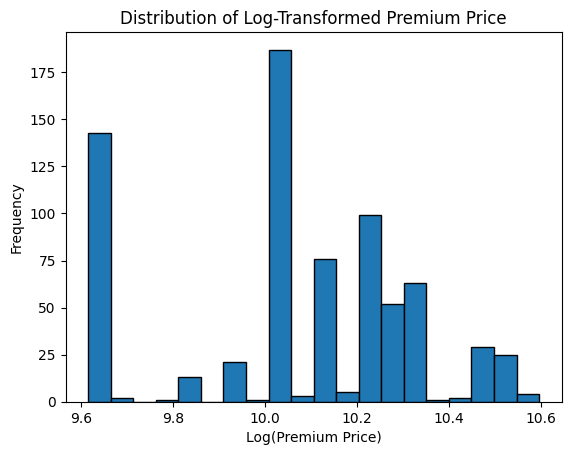

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apply logarithmic transformation to premium prices
log_premiums = np.log(y_train)  # Apply to training data
log_premiums_test = np.log(y_test)  # Apply to test data

# Plot the transformed data
plt.hist(log_premiums, bins=20, edgecolor='black')
plt.title('Distribution of Log-Transformed Premium Price')
plt.xlabel('Log(Premium Price)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['PremiumPrice']),  # Exclude target column from features
    df['PremiumPrice'],                # Target column
    test_size=0.25
)

# Log-transform the target variable (y_train and y_test)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Define numerical pipeline
pipeNum = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listNum)])),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
pipeCat = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listCat)])),
    ('encoder', OneHotEncoder(dtype=int, drop='first'))
])

# Combine numerical and categorical pipelines
preprocessor = FeatureUnion([
    ('num', pipeNum),
    ('cat', pipeCat)
])

# Full pipeline with RandomForestRegressor
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=28,
        max_depth=30,
        max_features=None,
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=150
    ))
])

# Fit the pipeline using log-transformed target
pipeRf.fit(X_train, y_train_log)

# Predict on test data (log-transformed scale)
pred_test_log = pipeRf.predict(X_test)
pred_train_log = pipeRf.predict(X_train)

# Convert predictions back to the original scale
pred_test_original = np.exp(pred_test_log)

# Evaluate model on log scale
r2_log_train = r2_score(y_train_log, pred_train_log)
print(f'Rf: R^2 Score on Log-Scale (TRAIN): {r2_log_train}')
r2_log_test = r2_score(y_test_log, pred_test_log)
print(f'Rf: R^2 Score on Log-Scale (TEST): {r2_log_test}')

Rf: R^2 Score on Log-Scale (TRAIN): 0.9183762685480958
Rf: R^2 Score on Log-Scale (TEST): 0.8746384610448203


Random Forest Regressor: Test High/Low Premium Predication Accuracy with Log Transformation

In [ ]:
# Define the median from the original (non-log) PremiumPrice
median_premium = df_trim['PremiumPrice'].median()

# Mask to split high and low premiums (using the original target)
high_premium_mask = y_test > median_premium
low_premium_mask = y_test <= median_premium

# Split log-transformed true values
y_test_log_high = y_test_log[high_premium_mask]
y_test_log_low = y_test_log[low_premium_mask]

# Split log-transformed predictions
pred_test_log_high = pred_test_log[high_premium_mask]
pred_test_log_low = pred_test_log[low_premium_mask]

# Calculate R^2 scores for high and low premiums
r2_log_high = r2_score(y_test_log_high, pred_test_log_high)
r2_log_low = r2_score(y_test_log_low, pred_test_log_low)

print(f'R^2 Score for High Premiums (Log-Scale): {r2_log_high}')
print(f'R^2 Score for Low Premiums (Log-Scale): {r2_log_low}')

R^2 Score for High Premiums (Log-Scale): 0.17255232901186213
R^2 Score for Low Premiums (Log-Scale): 0.8267080778674476


Log helped!

## Box-Cox Transformtation on PremiumPrice
Applied after logarithmic transformation.
*Total transformation = Box-Cox(LogTrans(PremiumPrice)*

Box-Cox Transformation: Automatically identifies best power transformation to stabilize variance and reduce skewness

In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation
y_train_boxcox, lambda_ = boxcox(y_train)  # Box-Cox requires positive values
y_test_boxcox = boxcox(y_test, lmbda=lambda_)  # Use the same lambda for the test set

print(f'Optimal lambda for Box-Cox: {lambda_}')

Optimal lambda for Box-Cox: 0.7508109155855606


Random Forest with Box-Cox

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from scipy.special import boxcox, inv_boxcox

optimal_lambda = lambda_

# Apply the Box-Cox transformation using the optimal lambda
y_train_boxcox = boxcox(y_train, optimal_lambda)
y_test_boxcox = boxcox(y_test, optimal_lambda)

# Define numerical pipeline
pipeNum = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listNum)])),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
pipeCat = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listCat)])),
    ('encoder', OneHotEncoder(dtype=int, drop='first'))
])

# Combine numerical and categorical pipelines
preprocessor = FeatureUnion([
    ('num', pipeNum),
    ('cat', pipeCat)
])

# Full pipeline with RandomForestRegressor
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=28))
])

# Fit the pipeline using the transformed target
pipeRf.fit(X_train, y_train_boxcox)

# Predict on test data (Box-Cox scale)
pred_train_boxcox = pipeRf.predict(X_train)
pred_test_boxcox = pipeRf.predict(X_test)

# Evaluate the model on the Box-Cox scale
r2_boxcox_train = r2_score(y_train_boxcox, pred_train_boxcox)
print(f'R^2 Score on Box-Cox Scale (TRAIN): {r2_boxcox_train}')

r2_boxcox_test = r2_score(y_test_boxcox, pred_test_boxcox)
print(f'R^2 Score on Box-Cox Scale (TEST): {r2_boxcox_test}')

# Back-transform predictions to the original scale for interpretation
pred_test_original = inv_boxcox(pred_test_boxcox, optimal_lambda)

# Evaluate the model on the original scale
r2_original = r2_score(y_test, pred_test_original)
print(f'R^2 Score on Original Scale: {r2_original}')


R^2 Score on Box-Cox Scale (TRAIN): 0.9667910498636959
R^2 Score on Box-Cox Scale (TEST): 0.8484320871812412
R^2 Score on Original Scale: 0.8438886287579892


Test High/Low Premium Accuracy with Box-Cox

In [ ]:
# Define the median in the original scale (since Box-Cox is a transformation of the original)
median_premium = df_trim['PremiumPrice'].median()

# Use the original y_test to split high and low premiums
high_premium_mask = y_test > median_premium
low_premium_mask = y_test <= median_premium

# Back-transform predictions to the original scale
pred_test_original = inv_boxcox(pred_test_boxcox, optimal_lambda)

# Split predictions and true values into high and low groups (original scale)
pred_high_original = pred_test_original[high_premium_mask]
pred_low_original = pred_test_original[low_premium_mask]

y_high_original = y_test[high_premium_mask]
y_low_original = y_test[low_premium_mask]

# Calculate R^2 scores for high and low premiums (original scale)
r2_high = r2_score(y_high_original, pred_high_original)
r2_low = r2_score(y_low_original, pred_low_original)

print(f'R^2 Score for High Premiums (Box Cox): {r2_high}')
print(f'R^2 Score for Low Premiums (Box Cox): {r2_low}')

R^2 Score for High Premiums (Box Cox): 0.41625172050217074
R^2 Score for Low Premiums (Box Cox): 0.6861173676831662


## Square-root transformation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['PremiumPrice']),  # Exclude target column from features
    df['PremiumPrice'],                # Target column
    test_size=0.25
)

# Square root transform the target variable (y_train and y_test)
y_train_sqrt = np.sqrt(y_train)
y_test_sqrt = np.sqrt(y_test)

# Define numerical pipeline
pipeNum = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listNum)])),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
pipeCat = Pipeline([
    ('selector', ColumnTransformer([('selector', 'passthrough', listCat)])),
    ('encoder', OneHotEncoder(dtype=int, drop='first'))
])

# Combine numerical and categorical pipelines
preprocessor = FeatureUnion([
    ('num', pipeNum),
    ('cat', pipeCat)
])

# Full pipeline with RandomForestRegressor
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        random_state=28,
        max_depth=30,
        max_features=None,
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=150
    ))
])

# Fit the pipeline using square root-transformed target
pipeRf.fit(X_train, y_train_sqrt)

# Predict on test data (square root-transformed scale)
pred_test_sqrt = pipeRf.predict(X_test)
pred_train_sqrt = pipeRf.predict(X_train)

# Convert predictions back to the original scale
pred_test_original = pred_test_sqrt ** 2

# Evaluate model on square root scale
r2_sqrt_train = r2_score(y_train_sqrt, pred_train_sqrt)
print(f'Rf: R^2 Score on Square Root-Scale (TRAIN): {r2_sqrt_train}')
r2_sqrt_test = r2_score(y_test_sqrt, pred_test_sqrt)
print(f'Rf: R^2 Score on Square Root-Scale (TEST): {r2_sqrt_test}')


Rf: R^2 Score on Square Root-Scale (TRAIN): 0.9214299739626977
Rf: R^2 Score on Square Root-Scale (TEST): 0.8404412667043147


Test High/Low Premium Accuracy

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Define the median in the original scale (since square root is a transformation of the original)
median_premium = df_trim['PremiumPrice'].median()

# Use the original y_test to split high and low premiums
high_premium_mask = y_test > median_premium
low_premium_mask = y_test <= median_premium

# Back-transform predictions to the original scale
pred_test_original = pred_test_sqrt ** 2

# Split predictions and true values into high and low groups (original scale)
pred_high_original = pred_test_original[high_premium_mask]
pred_low_original = pred_test_original[low_premium_mask]

y_high_original = y_test[high_premium_mask]
y_low_original = y_test[low_premium_mask]

# Calculate R^2 scores for high and low premiums (original scale)
r2_high = r2_score(y_high_original, pred_high_original)
r2_low = r2_score(y_low_original, pred_low_original)

print(f'R^2 Score for High Premiums (Square Root): {r2_high}')
print(f'R^2 Score for Low Premiums (Square Root): {r2_low}')


R^2 Score for High Premiums (Square Root): 0.3535249653627204
R^2 Score for Low Premiums (Square Root): 0.7147096338768806


## Quantile Transformation

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['PremiumPrice']),  # Exclude target column from features
    df['PremiumPrice'],                # Target column
    test_size=0.25,
    random_state=42
)

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Fit and transform the target variable (y_train)
y_train_transformed = quantile_transformer.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = quantile_transformer.transform(y_test.values.reshape(-1, 1)).flatten()

# Define the regression model pipeline
pipeRf = Pipeline([
    ('model', RandomForestRegressor(
        random_state=42,
        max_depth=30,
        max_features=None,
        min_samples_leaf=2,
        min_samples_split=5,
        n_estimators=150
    ))
])

# Fit the pipeline with the transformed target
pipeRf.fit(X_train, y_train_transformed)

# Predict on the test set (Quantile-transformed scale)
pred_train_transformed = pipeRf.predict(X_train)
pred_test_transformed = pipeRf.predict(X_test)

# Evaluate the model on the Quantile-transformed scale
r2_transformed_train = r2_score(y_train_transformed, pred_train_transformed)
r2_transformed_test = r2_score(y_test_transformed, pred_test_transformed)

print(f'R^2 Score on Quantile-Transformed Scale (TRAIN): {r2_transformed_train}')
print(f'R^2 Score on Quantile-Transformed Scale (TEST): {r2_transformed_test}')

# Back-transform predictions to the original scale
pred_train_original = quantile_transformer.inverse_transform(pred_train_transformed.reshape(-1, 1)).flatten()
pred_test_original = quantile_transformer.inverse_transform(pred_test_transformed.reshape(-1, 1)).flatten()

# Evaluate the model on the original scale
r2_original_train = r2_score(y_train, pred_train_original)
r2_original_test = r2_score(y_test, pred_test_original)

print(f'R^2 Score on Original Scale (TRAIN): {r2_original_train}')
print(f'R^2 Score on Original Scale (TEST): {r2_original_test}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (739). n_quantiles is set to n_samples.
  warnings.warn(


R^2 Score on Quantile-Transformed Scale (TRAIN): 0.9406295865489411
R^2 Score on Quantile-Transformed Scale (TEST): 0.9033152194707793
R^2 Score on Original Scale (TRAIN): 0.8423239341242673
R^2 Score on Original Scale (TEST): 0.8262304729050051


Test High/Low Premium Accuracy

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Define the median in the original scale (Quantile transformation is applied to the original data)
median_premium = df['PremiumPrice'].median()

# Use the original y_test to split high and low premiums
high_premium_mask = y_test > median_premium
low_premium_mask = y_test <= median_premium

# Back-transform predictions to the original scale
pred_test_original = quantile_transformer.inverse_transform(pred_test_transformed.reshape(-1, 1)).flatten()

# Split predictions and true values into high and low groups (original scale)
pred_high_original = pred_test_original[high_premium_mask]
pred_low_original = pred_test_original[low_premium_mask]

y_high_original = y_test[high_premium_mask]
y_low_original = y_test[low_premium_mask]

# Calculate R^2 scores for high and low premiums (original scale)
r2_high = r2_score(y_high_original, pred_high_original)
r2_low = r2_score(y_low_original, pred_low_original)

print(f'R^2 Score for High Premiums (Original Scale): {r2_high}')
print(f'R^2 Score for Low Premiums (Original Scale): {r2_low}')


R^2 Score for High Premiums (Original Scale): 0.18558498864683626
R^2 Score for Low Premiums (Original Scale): 0.8444511971600007


Feature Importance

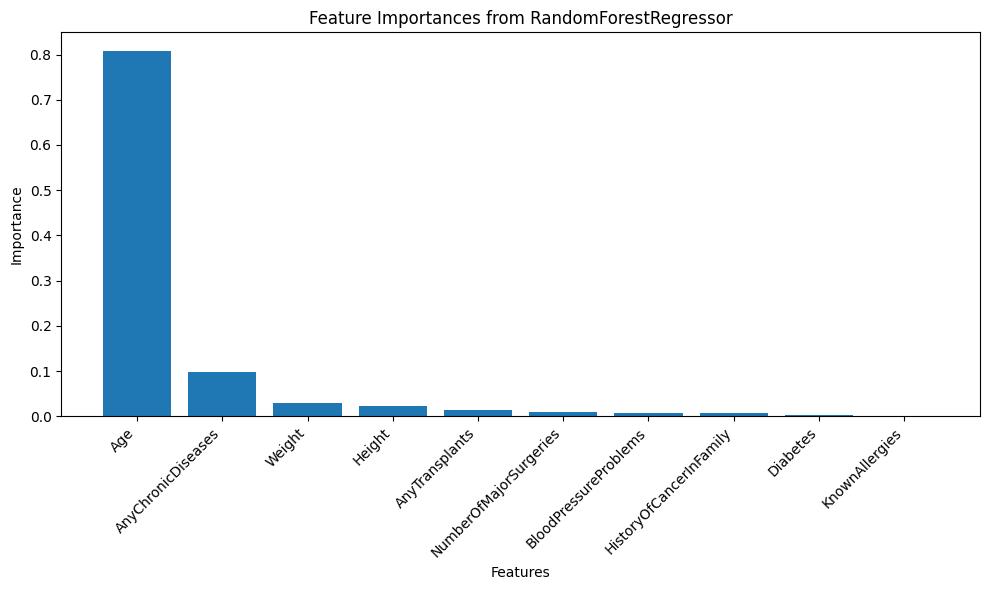

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the trained RandomForestRegressor from the pipeline
rf_model = pipeRf.named_steps['model']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances for better visualization
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.tight_layout()
plt.show()
